# Exploring Weather Trends
### by Phone Thiri Yadana

In this project, we will analyze Gobal vs Singapore weather data across 10 Years Moving Average.

[<img src="./new24397338.png"/>](https://www.vectorstock.com/royalty-free-vector/kawaii-world-and-thermometer-cartoon-vector-24397338)

-------------

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#load data
global_df = pd.read_csv("Data/global_data.csv")
city_df = pd.read_csv("Data/city_data.csv")
city_list_df = pd.read_csv("Data/city_list.csv")

## Check info, duplicate or missing data

In [3]:
global_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
global_df.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [5]:
global_df.shape

(266, 2)

In [6]:
sum(global_df.duplicated())

0

In [7]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [8]:
city_df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [9]:
city_df.shape

(71311, 4)

In [10]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   city      71311 non-null  object 
 2   country   71311 non-null  object 
 3   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [11]:
sum(city_df.duplicated())

0

In [12]:
city_list_df.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [13]:
city_list_df.shape

(345, 2)

In [14]:
city_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     345 non-null    object
 1   country  345 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [15]:
sum(city_list_df.duplicated())

0

## Calculate Moving Average

### Global Temperature

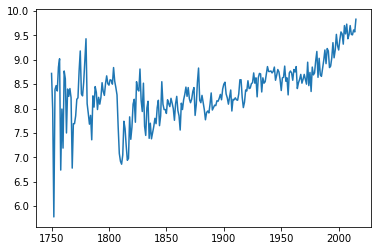

In [16]:
#yearly plot
plt.plot(global_df["year"], global_df["avg_temp"])

In [17]:
# 10 years Moving Avearge
global_df["10 Years MA"] = global_df["avg_temp"].rolling(window=10).mean()

In [18]:
global_df.iloc[8:18, :]

,year,avg_temp,10 Years MA
8,1758,6.74,NaN
9,1759,7.99,8.030
10,1760,7.19,7.877
11,1761,8.77,7.956
12,1762,8.61,8.239
13,1763,7.50,8.150
14,1764,8.40,8.143
15,1765,8.25,8.132
16,1766,8.41,8.088
17,1767,8.22,8.008


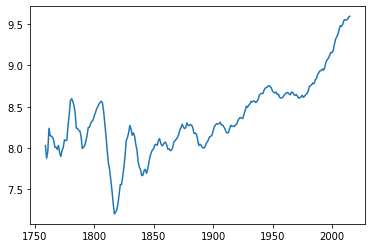

In [19]:
#10 years Moving Average
plt.plot(global_df["year"], global_df["10 Years MA"])

### Specific City Temperature (Singapore)

In [20]:
city_df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [21]:
singapore_df = city_df[city_df["country"] == "Singapore"]

In [22]:
singapore_df.head()

,year,city,country,avg_temp
60051,1825,Singapore,Singapore,26.43
60052,1826,Singapore,Singapore,NaN
60053,1827,Singapore,Singapore,NaN
60054,1828,Singapore,Singapore,NaN
60055,1829,Singapore,Singapore,NaN


In [23]:
singapore_df.tail()

,year,city,country,avg_temp
60235,2009,Singapore,Singapore,27.47
60236,2010,Singapore,Singapore,27.60
60237,2011,Singapore,Singapore,27.28
60238,2012,Singapore,Singapore,27.30
60239,2013,Singapore,Singapore,27.60


In [24]:
#check which rows are missing values
singapore_df[singapore_df["avg_temp"].isnull()]

,year,city,country,avg_temp
60052,1826,Singapore,Singapore,NaN
60053,1827,Singapore,Singapore,NaN
60054,1828,Singapore,Singapore,NaN
60055,1829,Singapore,Singapore,NaN
60056,1830,Singapore,Singapore,NaN
60057,1831,Singapore,Singapore,NaN
60058,1832,Singapore,Singapore,NaN
60059,1833,Singapore,Singapore,NaN
60060,1834,Singapore,Singapore,NaN
60061,1835,Singapore,Singapore,NaN


As singapore data are missing from 1826 till 1862, so it won't make sense to compare temperature during those period.

In [25]:
singapore_df = singapore_df[singapore_df["year"] >= 1863]

In [26]:
# to make sure, check again for null values
singapore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 60089 to 60239
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      151 non-null    int64  
 1   city      151 non-null    object 
 2   country   151 non-null    object 
 3   avg_temp  151 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [27]:
singapore_df.head()

,year,city,country,avg_temp
60089,1863,Singapore,Singapore,26.09
60090,1864,Singapore,Singapore,25.92
60091,1865,Singapore,Singapore,26.15
60092,1866,Singapore,Singapore,26.12
60093,1867,Singapore,Singapore,26.04


In [28]:
# calculate 10 years moving average
singapore_df["10 Years MA"] = singapore_df["avg_temp"].rolling(window=10).mean()

In [29]:
singapore_df.iloc[8:18, :]

,year,city,country,avg_temp,10 Years MA
60097,1871,Singapore,Singapore,25.58,NaN
60098,1872,Singapore,Singapore,26.17,25.977
60099,1873,Singapore,Singapore,26.40,26.008
60100,1874,Singapore,Singapore,26.09,26.025
60101,1875,Singapore,Singapore,25.47,25.957
60102,1876,Singapore,Singapore,25.72,25.917
60103,1877,Singapore,Singapore,26.25,25.938
60104,1878,Singapore,Singapore,26.57,25.980
60105,1879,Singapore,Singapore,25.75,25.957
60106,1880,Singapore,Singapore,26.12,26.012


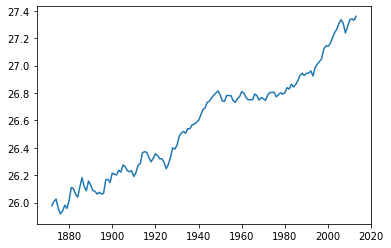

In [30]:
plt.plot(singapore_df["year"], singapore_df["10 Years MA"])

## Compare with Global Data (10 Years Moving Average)

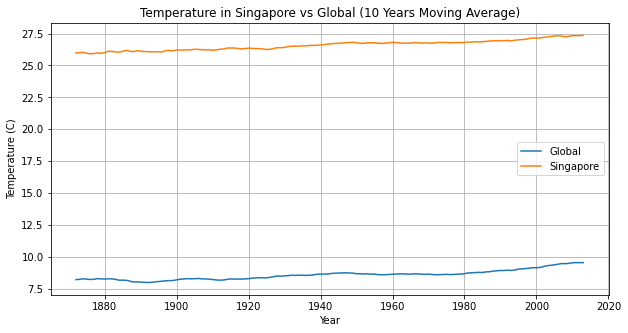

In [31]:
years = global_df.query('year >= 1872 & year <= 2013')[["year"]]
global_ma = global_df.query('year >= 1872 & year <= 2013')[["10 Years MA"]]
singapore_ma = singapore_df.query('year >= 1872 & year <= 2013')["10 Years MA"]

plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(years, global_ma, label = "Global")
plt.plot(years,singapore_ma, label = "Singapore")

plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.title("Temperature in Singapore vs Global (10 Years Moving Average)")
plt.legend()
plt.show()

In [32]:
global_ma.describe()

,10 Years MA
count,142.000000
mean,8.588401
std,0.380047
min,8.000000
25%,8.277250
50%,8.611500
75%,8.740250
max,9.556000


In [33]:
singapore_ma.describe()

count    142.000000
mean      26.582585
std        0.389037
min       25.917000
25%       26.232250
50%       26.684000
75%       26.804750
max       27.360000
Name: 10 Years MA, dtype: float64

----------------------

# Observations:

- As per the findings, we can see in the plot that both Global and Specific City (In this case: Singapore) temperature are rising over the years.

- There are certain ups and downs before 1920 and since then Temperatures have been steadily increasing.